# Libraries

In [1]:
%%capture
!pip install gwpy
!pip install gwosc # provides an interface to querying the open data releases hosted on https://gwosc.org

In [31]:
from gwpy.table import EventTable
from gwpy.table import GravitySpyTable
from gwpy.time import to_gps

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")
%matplotlib inline

In [15]:
import pandas as pd

# Catalogue Search

## Data

In [3]:
gwtc2Search = EventTable.fetch_open_data("GWTC-2")

In [4]:
print(gwtc2Search)

       name        total_mass_source_lower ... chirp_mass mass_2_source_lower
                           solMass         ...  solMass         solMass      
------------------ ----------------------- ... ---------- -------------------
GW190930_133541-v1                    -1.5 ...        9.8                -3.3
GW190929_012149-v1                   -25.2 ...       52.2               -10.6
GW190924_021846-v1                    -1.0 ...       6.44                -1.9
GW190915_235702-v1                    -6.4 ...       33.1                -6.1
GW190910_112807-v1                    -9.1 ...       43.9                -7.2
GW190909_114149-v1                   -17.6 ...       49.8               -12.7
GW190828_065509-v1                    -4.4 ...       17.4                -2.1
GW190828_063405-v1                    -4.8 ...       34.5                -4.8
       GW190814-v2                    -0.9 ...       6.41               -0.09
GW190803_022701-v1                    -9.0 ...       42.7       

In [7]:
gwtc2Search.colnames

['name',
 'total_mass_source_lower',
 'network_matched_filter_snr_upper',
 'final_mass_source_upper',
 'redshift_lower',
 'mass_1_source_upper',
 'mass_1_source',
 'GPS',
 'far',
 'luminosity_distance',
 'p_astro_lower',
 'network_matched_filter_snr',
 'chirp_mass_source',
 'total_mass_source',
 'commonName',
 'redshift',
 'luminosity_distance_lower',
 'chi_eff_lower',
 'chirp_mass_lower',
 'redshift_upper',
 'chirp_mass_upper',
 'chi_eff_upper',
 'reference',
 'network_matched_filter_snr_lower',
 'version',
 'far_upper',
 'p_astro',
 'mass_2_source_upper',
 'final_mass_source',
 'mass_2_source',
 'jsonurl',
 'total_mass_source_upper',
 'chirp_mass_source_upper',
 'chi_eff',
 'final_mass_source_lower',
 'catalog.shortName',
 'mass_1_source_lower',
 'luminosity_distance_upper',
 'chirp_mass_source_lower',
 'far_lower',
 'p_astro_upper',
 'chirp_mass',
 'mass_2_source_lower']

In [5]:
gwtc2Search.info()

<EventTable masked=True length=39>
              name                dtype    unit            description           
-------------------------------- ------- ------- --------------------------------
                            name   str18                                         
         total_mass_source_lower float64 solMass          total_mass_source_lower
network_matched_filter_snr_upper  object         network_matched_filter_snr_upper
         final_mass_source_upper  object solMass          final_mass_source_upper
                  redshift_lower float64                           redshift_lower
             mass_1_source_upper float64 solMass              mass_1_source_upper
                   mass_1_source float64 solMass                    mass_1_source
                             GPS float64                                      GPS
                             far float64  1 / yr                              far
             luminosity_distance float64     Mpc              l

## Filter Data

In [27]:
filteredGWTC = gwtc2Search.filter(
    "total_mass_source > 2"
)

In [30]:
filteredGWTC

name,total_mass_source_lower,network_matched_filter_snr_upper,final_mass_source_upper,redshift_lower,mass_1_source_upper,mass_1_source,GPS,far,luminosity_distance,p_astro_lower,network_matched_filter_snr,chirp_mass_source,total_mass_source,commonName,redshift,luminosity_distance_lower,chi_eff_lower,chirp_mass_lower,redshift_upper,chirp_mass_upper,chi_eff_upper,reference,network_matched_filter_snr_lower,version,far_upper,p_astro,mass_2_source_upper,final_mass_source,mass_2_source,jsonurl,total_mass_source_upper,chirp_mass_source_upper,chi_eff,final_mass_source_lower,catalog.shortName,mass_1_source_lower,luminosity_distance_upper,chirp_mass_source_lower,far_lower,p_astro_upper,chirp_mass,mass_2_source_lower
,solMass,,solMass,,solMass,solMass,,1 / yr,Mpc,,,solMass,solMass,,,Mpc,,solMass,,solMass,,,,,1 / yr,,solMass,solMass,solMass,,solMass,solMass,,solMass,,solMass,Mpc,solMass,1 / yr,,solMass,solMass
str18,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,str15,float64,float64,float64,float64,float64,float64,float64,str8,object,int64,object,object,float64,object,float64,str57,float64,float64,float64,object,str6,float64,float64,float64,object,object,float64,float64
GW190930_133541-v1,-1.5,None,9.2,-0.06,12.4,12.3,1253885759.2,0.03309219802659227,760.0,None,10.01932734846673,8.5,20.3,GW190930_133541,0.15,-320.0,-0.15,-0.2,0.06,0.2,0.31,/GWTC-2/,None,1,None,0.997,1.7,19.4,7.8,https://gwosc.org/eventapi/json/GWTC-2/GW190930_133541/v1,8.9,0.5,0.14,-1.5,GWTC-2,-2.3,360.0,-0.5,None,None,9.8,-3.3
GW190929_012149-v1,-25.2,None,33.6,-0.17,33.0,80.8,1253755327.5,0.020161443585491597,2130.0,None,9.875628916044713,35.8,104.3,GW190929_012149,0.38,-1050.0,-0.33,-15.4,0.49,19.9,0.34,/GWTC-2/,None,1,None,0.995693,19.3,101.5,24.1,https://gwosc.org/eventapi/json/GWTC-2/GW190929_012149/v1,34.9,14.9,0.01,-25.3,GWTC-2,-33.2,3650.0,-8.2,None,None,52.2,-10.6
GW190924_021846-v1,-1.0,None,5.2,-0.04,7.0,8.9,1253326744.8,1e-05,570.0,None,13.15903752184739,5.8,13.9,GW190924_021846,0.12,-220.0,-0.09,-0.03,0.04,0.04,0.3,/GWTC-2/,None,1,None,1.0,1.4,13.3,5.0,https://gwosc.org/eventapi/json/GWTC-2/GW190924_021846/v1,5.1,0.2,0.03,-1.0,GWTC-2,-2.0,220.0,-0.2,None,None,6.44,-1.9
GW190915_235702-v1,-6.4,None,7.1,-0.1,9.5,35.3,1252627040.7,1e-05,1620.0,None,13.07209167194663,25.3,59.9,GW190915_235702,0.3,-610.0,-0.25,-3.9,0.11,3.3,0.2,/GWTC-2/,None,1,None,1.0,5.6,57.2,24.4,https://gwosc.org/eventapi/json/GWTC-2/GW190915_235702/v1,7.5,3.2,0.02,-6.0,GWTC-2,-6.4,710.0,-2.7,None,None,33.1,-6.1
GW190910_112807-v1,-9.1,None,8.5,-0.1,7.6,43.9,1252150105.3,1.8852694587530696e-05,1460.0,None,13.41737344451953,34.3,79.6,GW190910_112807,0.28,-580.0,-0.18,-3.6,0.16,4.6,0.18,/GWTC-2/,None,1,None,0.999988,6.3,75.8,35.6,https://gwosc.org/eventapi/json/GWTC-2/GW190910_112807/v1,9.3,4.1,0.02,-8.6,GWTC-2,-6.1,1030.0,-4.1,None,None,43.9,-7.2
GW190909_114149-v1,-17.6,None,54.9,-0.33,52.7,45.8,1252064527.7,1.1112276612026477,3770.0,None,9.047895,30.9,75.0,GW190909_114149,0.62,-2220.0,-0.36,-12.4,0.41,32.2,0.37,/GWTC-2/,None,1,None,0.886704,13.4,72.0,28.3,https://gwosc.org/eventapi/json/GWTC-2/GW190909_114149/v1,55.9,17.2,-0.06,-16.8,GWTC-2,-13.3,3270.0,-7.5,None,None,49.8,-12.7
GW190828_065509-v1,-4.4,None,5.5,-0.1,7.0,24.1,1251010527.9,1e-05,1600.0,None,11.12790886853085,13.3,34.4,GW190828_065509,0.3,-600.0,-0.16,-0.7,0.1,0.6,0.16,/GWTC-2/,None,1,None,1.0,3.6,33.1,10.2,https://gwosc.org/eventapi/json/GWTC-2/GW190828_065509/v1,5.4,1.2,0.08,-4.5,GWTC-2,-7.2,620.0,-1.0,None,None,17.4,-2.1
GW190828_063405-v1,-4.8,None,7.2,-0.15,5.8,32.1,1251009263.8,1e-05,2130.0,None,16.629603122143354,25.0,58.0,GW190828_063405,0.38,-930.0,-0.16,-2.8,0.1,2.9,0.15,/GWTC-2/,None,1,None,1.0,4.6,54.9,26.2,https://gwosc.org/eventapi/json/GWTC-2/GW190828_063405/v1,7.7,3.4,0.19,-4.3,GWTC-2,-4.0,660.0,-2.1,None,None,34.5,-4.8


In [41]:
filteredData = gwtc2Search.filter("network_matched_filter_snr > 15","luminosity_distance > 1000")

In [42]:
filteredData

name,total_mass_source_lower,network_matched_filter_snr_upper,final_mass_source_upper,redshift_lower,mass_1_source_upper,mass_1_source,GPS,far,luminosity_distance,p_astro_lower,network_matched_filter_snr,chirp_mass_source,total_mass_source,commonName,redshift,luminosity_distance_lower,chi_eff_lower,chirp_mass_lower,redshift_upper,chirp_mass_upper,chi_eff_upper,reference,network_matched_filter_snr_lower,version,far_upper,p_astro,mass_2_source_upper,final_mass_source,mass_2_source,jsonurl,total_mass_source_upper,chirp_mass_source_upper,chi_eff,final_mass_source_lower,catalog.shortName,mass_1_source_lower,luminosity_distance_upper,chirp_mass_source_lower,far_lower,p_astro_upper,chirp_mass,mass_2_source_lower
,solMass,,solMass,,solMass,solMass,,1 / yr,Mpc,,,solMass,solMass,,,Mpc,,solMass,,solMass,,,,,1 / yr,,solMass,solMass,solMass,,solMass,solMass,,solMass,,solMass,Mpc,solMass,1 / yr,,solMass,solMass
str18,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,str15,float64,float64,float64,float64,float64,float64,float64,str8,object,int64,object,object,float64,object,float64,str57,float64,float64,float64,object,str6,float64,float64,float64,object,object,float64,float64
GW190828_063405-v1,-4.8,None,7.2,-0.15,5.8,32.1,1251009263.8,1e-05,2130.0,None,16.629603122143354,25.0,58.0,GW190828_063405,0.38,-930.0,-0.16,-2.8,0.1,2.9,0.15,/GWTC-2/,None,1,None,1.0,4.6,54.9,26.2,https://gwosc.org/eventapi/json/GWTC-2/GW190828_063405/v1,7.7,3.4,0.19,-4.3,GWTC-2,-4.0,660.0,-2.1,None,None,34.5,-4.8
GW190521_074359-v1,-4.8,None,6.5,-0.1,5.9,42.2,1242459857.5,1e-05,1240.0,None,24.67251912553722,32.1,74.7,GW190521_074359,0.24,-570.0,-0.13,-3.0,0.07,2.2,0.1,/GWTC-2/,None,1,None,1.0,5.4,71.0,32.8,https://gwosc.org/eventapi/json/GWTC-2/GW190521_074359/v1,7.0,3.2,0.09,-4.4,GWTC-2,-4.8,400.0,-2.5,None,None,39.8,-6.4


## Filter Data with Function

In [32]:
startTime = to_gps("Jan 2019")
endTime = to_gps("Jul 2019")

In [34]:
print(f"Start Time as GPS: {startTime}")
print(f"End Time as GPS: {endTime}")

Start Time as GPS: 1231632018
End Time as GPS: 1247270418


In [35]:
def FilterFunction(column,interval):
  "Returns `True` if ``interval[0] <= column < interval[1]``"
  query = (column >= interval[0]) & (column < interval[1])
  return query

In [36]:
filteredData  = gwtc2Search.filter(("GPS",FilterFunction,(startTime,endTime)))

In [37]:
filteredData

name,total_mass_source_lower,network_matched_filter_snr_upper,final_mass_source_upper,redshift_lower,mass_1_source_upper,mass_1_source,GPS,far,luminosity_distance,p_astro_lower,network_matched_filter_snr,chirp_mass_source,total_mass_source,commonName,redshift,luminosity_distance_lower,chi_eff_lower,chirp_mass_lower,redshift_upper,chirp_mass_upper,chi_eff_upper,reference,network_matched_filter_snr_lower,version,far_upper,p_astro,mass_2_source_upper,final_mass_source,mass_2_source,jsonurl,total_mass_source_upper,chirp_mass_source_upper,chi_eff,final_mass_source_lower,catalog.shortName,mass_1_source_lower,luminosity_distance_upper,chirp_mass_source_lower,far_lower,p_astro_upper,chirp_mass,mass_2_source_lower
,solMass,,solMass,,solMass,solMass,,1 / yr,Mpc,,,solMass,solMass,,,Mpc,,solMass,,solMass,,,,,1 / yr,,solMass,solMass,solMass,,solMass,solMass,,solMass,,solMass,Mpc,solMass,1 / yr,,solMass,solMass
str18,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,str15,float64,float64,float64,float64,float64,float64,float64,str8,object,int64,object,object,float64,object,float64,str57,float64,float64,float64,object,str6,float64,float64,float64,object,object,float64,float64
GW190708_232457-v1,-1.8,None,2.5,-0.07,4.7,17.6,1246663515.4,2.8252506364808675e-05,880.0,None,13.07130069939341,13.2,30.9,GW190708_232457,0.18,-390.0,-0.08,-0.2,0.06,0.3,0.1,/GWTC-2/,None,1,None,0.999988,2.0,29.5,13.2,https://gwosc.org/eventapi/json/GWTC-2/GW190708_232457/v1,2.5,0.9,0.02,-1.8,GWTC-2,-2.3,330.0,-0.6,None,None,15.5,-2.7
GW190707_093326-v1,-1.3,None,1.9,-0.07,3.3,11.6,1246527224.2,1e-05,770.0,None,12.97817936002082,8.5,20.1,GW190707_093326,0.16,-370.0,-0.08,-0.09,0.07,0.1,0.1,/GWTC-2/,None,1,None,1.0,1.4,19.2,8.4,https://gwosc.org/eventapi/json/GWTC-2/GW190707_093326/v1,1.9,0.6,-0.05,-1.3,GWTC-2,-1.7,380.0,-0.5,None,None,9.89,-1.7
GW190706_222641-v1,-13.9,None,18.3,-0.27,14.6,67.0,1246487219.3,1e-05,4420.0,None,12.653616083950073,42.7,104.1,GW190706_222641,0.71,-1930.0,-0.29,-17.5,0.32,11.0,0.26,/GWTC-2/,None,1,None,1.0,14.6,99.0,38.2,https://gwosc.org/eventapi/json/GWTC-2/GW190706_222641/v1,20.2,10.0,0.28,-13.5,GWTC-2,-16.2,2590.0,-7.0,None,None,75.1,-13.3
GW190701_203306-v1,-9.5,None,11.3,-0.12,11.8,53.9,1246048404.6,0.010861368605368522,2060.0,None,11.58996006414267,40.3,94.3,GW190701_203306,0.37,-730.0,-0.29,-8.1,0.11,7.3,0.23,/GWTC-2/,None,1,None,0.997879,8.7,90.2,40.8,https://gwosc.org/eventapi/json/GWTC-2/GW190701_203306/v1,12.1,5.4,-0.07,-8.9,GWTC-2,-8.0,760.0,-4.9,None,None,55.5,-12.0
GW190630_185205-v1,-4.8,None,4.4,-0.07,6.9,35.1,1245955943.2,1e-05,890.0,None,15.64051208963232,24.9,59.1,GW190630_185205,0.18,-370.0,-0.13,-1.5,0.1,1.6,0.12,/GWTC-2/,None,1,None,1.0,5.2,56.4,23.7,https://gwosc.org/eventapi/json/GWTC-2/GW190630_185205/v1,4.6,2.1,0.1,-4.6,GWTC-2,-5.6,560.0,-2.1,None,None,29.4,-5.1
GW190620_030421-v1,-13.1,None,16.8,-0.2,16.0,57.1,1245035079.3,0.0029209383726319974,2810.0,None,10.91846314686192,38.3,92.1,GW190620_030421,0.49,-1310.0,-0.25,-11.2,0.23,9.0,0.22,/GWTC-2/,None,1,None,0.999133,12.2,87.2,35.5,https://gwosc.org/eventapi/json/GWTC-2/GW190620_030421/v1,18.5,8.3,0.33,-12.1,GWTC-2,-12.7,1680.0,-6.5,None,None,57.5,-12.3
GW190602_175927-v1,-15.6,None,17.7,-0.17,15.7,69.1,1243533585.1,1.1478437256536947e-05,2690.0,None,12.13087548611321,49.1,116.3,GW190602_175927,0.47,-1120.0,-0.24,-13.7,0.25,10.8,0.25,/GWTC-2/,None,1,None,0.999994,14.3,110.9,47.8,https://gwosc.org/eventapi/json/GWTC-2/GW190602_175927/v1,19.0,9.1,0.07,-14.9,GWTC-2,-13.0,1790.0,-8.5,None,None,72.9,-17.4
GW190527_092055-v1,-9.8,None,20.2,-0.2,16.4,36.5,1242984073.8,0.062270351314133505,2490.0,None,8.867476217742222,24.3,59.1,GW190527_092055,0.44,-1240.0,-0.28,-5.5,0.34,21.7,0.28,/GWTC-2/,None,1,None,0.988513,10.5,56.4,22.6,https://gwosc.org/eventapi/json/GWTC-2/GW190527_092055/v1,21.3,9.1,0.11,-9.3,GWTC-2,-9.0,2480.0,-4.2,None,None,34.9,-8.1


In [38]:
def HighMassRatio(table,threshold):
  query = (table["mass_1_source"]/table["mass_2_source"]) >= threshold
  return query

In [39]:
filteredData = gwtc2Search.filter((("mass_1_source","mass_2_source"),HighMassRatio,3.0))

In [40]:
filteredData

name,total_mass_source_lower,network_matched_filter_snr_upper,final_mass_source_upper,redshift_lower,mass_1_source_upper,mass_1_source,GPS,far,luminosity_distance,p_astro_lower,network_matched_filter_snr,chirp_mass_source,total_mass_source,commonName,redshift,luminosity_distance_lower,chi_eff_lower,chirp_mass_lower,redshift_upper,chirp_mass_upper,chi_eff_upper,reference,network_matched_filter_snr_lower,version,far_upper,p_astro,mass_2_source_upper,final_mass_source,mass_2_source,jsonurl,total_mass_source_upper,chirp_mass_source_upper,chi_eff,final_mass_source_lower,catalog.shortName,mass_1_source_lower,luminosity_distance_upper,chirp_mass_source_lower,far_lower,p_astro_upper,chirp_mass,mass_2_source_lower
,solMass,,solMass,,solMass,solMass,,1 / yr,Mpc,,,solMass,solMass,,,Mpc,,solMass,,solMass,,,,,1 / yr,,solMass,solMass,solMass,,solMass,solMass,,solMass,,solMass,Mpc,solMass,1 / yr,,solMass,solMass
str18,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,str15,float64,float64,float64,float64,float64,float64,float64,str8,object,int64,object,object,float64,object,float64,str57,float64,float64,float64,object,str6,float64,float64,float64,object,object,float64,float64
GW190929_012149-v1,-25.2,None,33.6,-0.17,33.0,80.8,1253755327.5,0.020161443585491597,2130.0,None,9.875628916044713,35.8,104.3,GW190929_012149,0.38,-1050.0,-0.33,-15.4,0.49,19.9,0.34,/GWTC-2/,None,1,None,0.995693,19.3,101.5,24.1,https://gwosc.org/eventapi/json/GWTC-2/GW190929_012149/v1,34.9,14.9,0.01,-25.3,GWTC-2,-33.2,3650.0,-8.2,None,None,52.2,-10.6
GW190814-v2,-0.9,None,1.1,-0.01,1.1,23.2,1249852257.0,1e-05,240.0,None,22.17523325999954,6.09,25.8,GW190814,0.05,-50.0,-0.06,-0.02,0.009,0.02,0.06,/GWTC-2/,None,2,None,1.0,0.08,25.6,2.59,https://gwosc.org/eventapi/json/GWTC-2/GW190814/v2,1.0,0.06,0.0,-0.9,GWTC-2,-1.0,40.0,-0.06,None,None,6.41,-0.09
GW190426_152155-v1,-1.5,None,None,-0.03,3.9,5.7,1240327333.3,1.443741335492165,370.0,None,10.12041364677255,2.41,7.2,GW190426_152155,0.08,-160.0,-0.3,-0.01,0.04,0.01,0.32,/GWTC-2/,None,1,None,None,0.8,None,1.5,https://gwosc.org/eventapi/json/GWTC-2/GW190426_152155/v1,3.5,0.08,-0.03,None,GWTC-2,-2.3,180.0,-0.08,None,None,2.6,-0.5
GW190412-v3,-3.7,None,3.9,-0.03,4.7,30.1,1239082262.2,1e-05,740.0,None,19.674587670393503,13.3,38.4,GW190412,0.15,-170.0,-0.11,-0.2,0.03,0.2,0.08,/GWTC-2/,None,3,None,1.0,1.6,37.3,8.3,https://gwosc.org/eventapi/json/GWTC-2/GW190412/v3,3.8,0.4,0.25,-3.8,GWTC-2,-5.1,140.0,-0.3,None,None,15.2,-0.9


## To Dataframe

In [14]:
pandasFormat = gwtc2Search.to_pandas()

In [16]:
type(pandasFormat)

pandas.core.frame.DataFrame

In [17]:
pandasFormat.to_csv("eventgwtc2.csv")

In [18]:
pandasFormat

,total_mass_source_lower,network_matched_filter_snr_upper,final_mass_source_upper,redshift_lower,mass_1_source_upper,mass_1_source,GPS,far,luminosity_distance,p_astro_lower,...,chi_eff,final_mass_source_lower,catalog.shortName,mass_1_source_lower,luminosity_distance_upper,chirp_mass_source_lower,far_lower,p_astro_upper,chirp_mass,mass_2_source_lower
name,,,,,,,,,,,,,,,,,,,,,
GW190930_133541-v1,-1.5,None,9.2,-0.06,12.4,12.3,1.253886e+09,0.033092,760.0,None,...,0.14,-1.5,GWTC-2,-2.3,360.0,-0.50,None,None,9.80,-3.30
GW190929_012149-v1,-25.2,None,33.6,-0.17,33.0,80.8,1.253755e+09,0.020161,2130.0,None,...,0.01,-25.3,GWTC-2,-33.2,3650.0,-8.20,None,None,52.20,-10.60
GW190924_021846-v1,-1.0,None,5.2,-0.04,7.0,8.9,1.253327e+09,0.000010,570.0,None,...,0.03,-1.0,GWTC-2,-2.0,220.0,-0.20,None,None,6.44,-1.90
GW190915_235702-v1,-6.4,None,7.1,-0.10,9.5,35.3,1.252627e+09,0.000010,1620.0,None,...,0.02,-6.0,GWTC-2,-6.4,710.0,-2.70,None,None,33.10,-6.10
GW190910_112807-v1,-9.1,None,8.5,-0.10,7.6,43.9,1.252150e+09,0.000019,1460.0,None,...,0.02,-8.6,GWTC-2,-6.1,1030.0,-4.10,None,None,43.90,-7.20
GW190909_114149-v1,-17.6,None,54.9,-0.33,52.7,45.8,1.252065e+09,1.111228,3770.0,None,...,-0.06,-16.8,GWTC-2,-13.3,3270.0,-7.50,None,None,49.80,-12.70
GW190828_065509-v1,-4.4,None,5.5,-0.10,7.0,24.1,1.251011e+09,0.000010,1600.0,None,...,0.08,-4.5,GWTC-2,-7.2,620.0,-1.00,None,None,17.40,-2.10
GW190828_063405-v1,-4.8,None,7.2,-0.15,5.8,32.1,1.251009e+09,0.000010,2130.0,None,...,0.19,-4.3,GWTC-2,-4.0,660.0,-2.10,None,None,34.50,-4.80
GW190814-v2,-0.9,None,1.1,-0.01,1.1,23.2,1.249852e+09,0.000010,240.0,None,...,0.00,-0.9,GWTC-2,-1.0,40.0,-0.06,None,None,6.41,-0.09


## Histogram Example

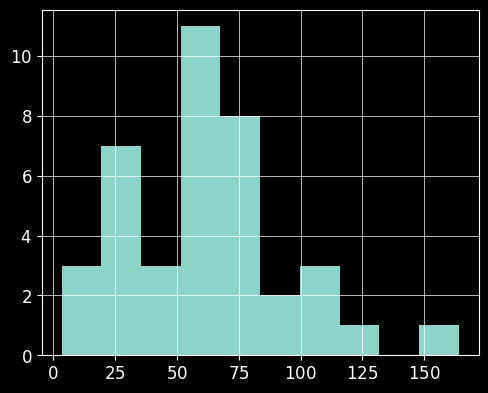

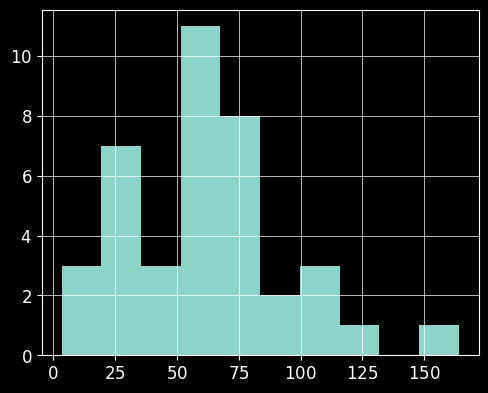

In [12]:
gwtc2Search.hist(column="total_mass_source")

## Scatter Example

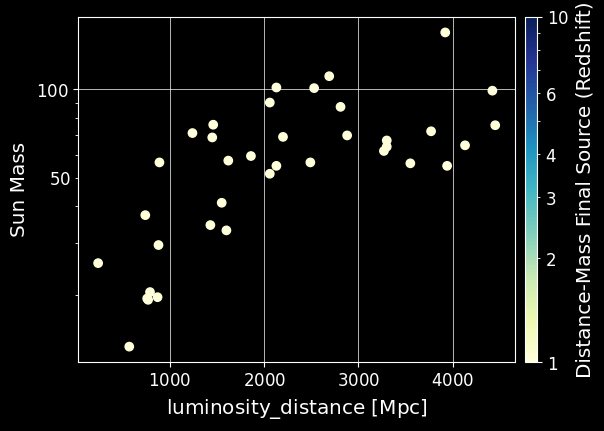

In [49]:
plot = gwtc2Search.scatter("luminosity_distance","final_mass_source",color="redshift")
ax = plot.gca()
#ax.set_epoch(968654552)
ax.set_yscale("log")
ax.set_ylabel("Sun Mass")
ax.colorbar(
    clim=[1,10],
    cmap="YlGnBu",
    norm="log",
    label="Distance-Mass Final Source (Redshift)"
)

# Filtered Queries

In [6]:
filteredQuery = EventTable.fetch_open_data(
    "GWTC-2",
    selection="mass_1_source < 4",
    columns=["name","mass_1_source","mass_2_source","luminosity_distance"]
)

In [19]:
filteredQuery

name,mass_1_source,mass_2_source,luminosity_distance
,solMass,solMass,Mpc
str18,float64,float64,float64
GW190425-v2,2.0,1.4,160.0


# GravitySpy Project Events

* Gravity Spy is a citizen-science project that enables the public to characterize and classify glitches in IGWN detector data.

In [ ]:
spyEvent = "8FHTgA8MEu"

In [23]:
glitchData = GravitySpyTable.search(spyEvent,howmany=5)

In [24]:
glitchData

gravityspy_id,event_time,ifo,peak_frequency,links_subjects,ml_label,searchedID,snr,searchedzooID,url4,url3,url2,url1
str10,float64,str2,float64,float64,str8,str10,float64,float64,str108,str108,str108,str108
nXpRtVw0E1,1136197460.59375,L1,73.4049224853516,20892632.0,Scratchy,8FHTgA8MEu,9.61655044555664,5740011.0,https://panoptes-uploads.zooniverse.org/production/subject_location/e3a08eb0-4c00-4bc6-832a-06878729a58b.png,https://panoptes-uploads.zooniverse.org/production/subject_location/8cc0b237-aa31-48f0-bd08-f893d0cd6e4b.png,https://panoptes-uploads.zooniverse.org/production/subject_location/d307b73c-1d35-4ddb-977d-5d00b99e905c.png,https://panoptes-uploads.zooniverse.org/production/subject_location/569586cb-b620-40dc-9431-aa93ffcb5b93.png
o8Ped3HpbD,1136196164.08398,L1,128.8896484375,20892636.0,Scratchy,8FHTgA8MEu,9.57275009155273,5740011.0,https://panoptes-uploads.zooniverse.org/production/subject_location/98a64c2d-d400-43d5-8f57-81b6960adf45.png,https://panoptes-uploads.zooniverse.org/production/subject_location/a4b7d7cb-29a7-423e-b6b0-b7d6a335a3c7.png,https://panoptes-uploads.zooniverse.org/production/subject_location/f6bdaf2e-c1b3-402b-bea3-9e60b3bd79b7.png,https://panoptes-uploads.zooniverse.org/production/subject_location/a732e956-380d-4157-a600-5bd3213bddc6.png
NmekeeeKU4,1136199783.21875,L1,75.5168914794922,20892526.0,Scratchy,8FHTgA8MEu,9.26747989654541,5740011.0,https://panoptes-uploads.zooniverse.org/production/subject_location/df4f6a38-394d-40b7-937f-61fbdad366c5.png,https://panoptes-uploads.zooniverse.org/production/subject_location/15162959-a67e-4baf-8d27-02e4028de7af.png,https://panoptes-uploads.zooniverse.org/production/subject_location/bbe620d1-0849-49f8-b655-06cf47336938.png,https://panoptes-uploads.zooniverse.org/production/subject_location/c201df60-4d63-4894-879f-0b65caeb2dea.png
8FHTgA8MEu,1165068881.28125,H1,84.4759674072266,5740011.0,Scratchy,8FHTgA8MEu,8.96664047241211,5740011.0,https://panoptes-uploads.zooniverse.org/production/subject_location/08895951-ea30-4cf7-9374-135a335afe0e.png,https://panoptes-uploads.zooniverse.org/production/subject_location/415dde44-3109-434c-b3ad-b722a879c159.png,https://panoptes-uploads.zooniverse.org/production/subject_location/09ebb6f4-e839-466f-80a1-64d79ac4d934.png,https://panoptes-uploads.zooniverse.org/production/subject_location/5e89d817-583c-4646-8e6c-9391bb99ad41.png
B744zbTvTs,1130154410.10742,L1,144.991333007812,8644242.0,Scratchy,8FHTgA8MEu,8.36054992675781,5740011.0,https://panoptes-uploads.zooniverse.org/production/subject_location/415521a9-a4eb-49a1-b5fb-9df44094fc47.png,https://panoptes-uploads.zooniverse.org/production/subject_location/33636821-85e4-46ea-b431-60b233cb742f.png,https://panoptes-uploads.zooniverse.org/production/subject_location/11ee8211-5299-4bce-8de4-27f4030e6e34.png,https://panoptes-uploads.zooniverse.org/production/subject_location/f54d85bf-b973-4514-9004-6491e9de88d1.png
